# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [11]:
import os
import keras
import itertools

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [12]:
train, test = keras.datasets.cifar10.load_data()

In [13]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [14]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [19]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    """
    Build your own model
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [20]:
## 超參數設定
"""
Set your required experiment parameters
"""
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
OPTIMIZER = [keras.optimizers.SGD, keras.optimizers.RMSprop, keras.optimizers.Adagrad, keras.optimizers.Adam]

In [21]:
"""
建立你的訓練與實驗迴圈並蒐集資料
"""
results = {}
for lr, opti in itertools.product(LEARNING_RATE, OPTIMIZER):
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f, Optimizer = %s" % (lr, str(opti)))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    
    optimizer = opti(lr=lr)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s-optimizer-%s" % (str(lr), str(opti))
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

W0722 15:20:48.529217  7708 deprecation_wrapper.py:119] From C:\Users\USER\Anaconda3\envs\tensorflow\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0722 15:20:48.532206  7708 deprecation_wrapper.py:119] From C:\Users\USER\Anaconda3\envs\tensorflow\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0722 15:20:48.607006  7708 deprecation_wrapper.py:119] From C:\Users\USER\Anaconda3\envs\tensorflow\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



Experiment with LR = 0.100000, Optimizer = <class 'keras.optimizers.SGD'>
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


W0722 15:20:48.790516  7708 deprecation.py:323] From C:\Users\USER\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 6s 110us/step - loss: 2.0377 - acc: 0.2589 - val_loss: 1.8176 - val_acc: 0.3532
Epoch 2/50
50000/50000 [==============================] - 5s 104us/step - loss: 1.8259 - acc: 0.3481 - val_loss: 1.9222 - val_acc: 0.2827
Epoch 3/50
50000/50000 [==============================] - 5s 101us/step - loss: 1.7404 - acc: 0.3782 - val_loss: 1.7270 - val_acc: 0.3762
Epoch 4/50
50000/50000 [==============================] - 5s 103us/step - loss: 1.6747 - acc: 0.4021 - val_loss: 1.6711 - val_acc: 0.4044
Epoch 5/50
50000/50000 [==============================] - 5s 105us/step - loss: 1.6305 - acc: 0.4176 - val_loss: 1.6663 - val_acc: 0.3871
Epoch 6/50
50000/50000 [==============================] - 5s 101us/step - loss: 1.5800 - acc: 0.4367 - val_loss: 1.7238 - val_acc: 0.3967
Epoch 7/50
50000/50000 [==============================] - 5s 102us/step - loss: 1.5447 - acc: 0.4510 - val_loss: 1.6100 - 

50000/50000 [==============================] - 7s 142us/step - loss: 14.4443 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 2/50
50000/50000 [==============================] - 7s 144us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/50
50000/50000 [==============================] - 7s 137us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 7s 143us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 7s 139us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 7s 136us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 7s 144us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 8/50
50000/50000 [=======

50000/50000 [==============================] - 7s 139us/step - loss: 14.4449 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 2/50
50000/50000 [==============================] - 7s 131us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/50
50000/50000 [==============================] - 6s 130us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 7s 137us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 7s 131us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 7s 136us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 6s 130us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 8/50
50000/50000 [=======

50000/50000 [==============================] - 8s 161us/step - loss: 14.4464 - acc: 0.0999 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 2/50
50000/50000 [==============================] - 8s 158us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/50
50000/50000 [==============================] - 8s 161us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 8s 156us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 8s 159us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 8s 157us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 8s 159us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 8/50
50000/50000 [=======

50000/50000 [==============================] - 6s 117us/step - loss: 2.0543 - acc: 0.2650 - val_loss: 1.9407 - val_acc: 0.2976
Epoch 2/50
50000/50000 [==============================] - 6s 115us/step - loss: 1.8812 - acc: 0.3370 - val_loss: 1.9026 - val_acc: 0.3258
Epoch 3/50
50000/50000 [==============================] - 6s 118us/step - loss: 1.8149 - acc: 0.3602 - val_loss: 1.8026 - val_acc: 0.3546
Epoch 4/50
50000/50000 [==============================] - 6s 115us/step - loss: 1.7697 - acc: 0.3779 - val_loss: 1.7651 - val_acc: 0.3715
Epoch 5/50
50000/50000 [==============================] - 6s 117us/step - loss: 1.7292 - acc: 0.3903 - val_loss: 1.7699 - val_acc: 0.3641
Epoch 6/50
50000/50000 [==============================] - 6s 120us/step - loss: 1.7033 - acc: 0.4001 - val_loss: 1.6994 - val_acc: 0.3916
Epoch 7/50
50000/50000 [==============================] - 6s 114us/step - loss: 1.6776 - acc: 0.4086 - val_loss: 1.7079 - val_acc: 0.3939
Epoch 8/50
50000/50000 [=====================

Epoch 2/50
50000/50000 [==============================] - 7s 140us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/50
50000/50000 [==============================] - 7s 142us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 7s 141us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 7s 138us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 7s 144us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 7s 139us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 8/50
50000/50000 [==============================] - 7s 143us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 9/50
50000/500

50000/50000 [==============================] - 7s 135us/step - loss: 14.5000 - acc: 0.1001 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/50
50000/50000 [==============================] - 7s 131us/step - loss: 14.5061 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 7s 132us/step - loss: 14.4967 - acc: 0.0997 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 7s 134us/step - loss: 14.4993 - acc: 0.1000 - val_loss: 14.5009 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 6s 130us/step - loss: 14.4886 - acc: 0.0993 - val_loss: 14.5062 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 7s 138us/step - loss: 14.4932 - acc: 0.1003 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 8/50
50000/50000 [==============================] - 6s 130us/step - loss: 14.5013 - acc: 0.0998 - val_loss: 14.5062 - val_acc: 0.1000
Epoch 9/50
50000/50000 [=======

Epoch 3/50
50000/50000 [==============================] - 8s 159us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 8s 161us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 8s 155us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 8s 160us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 8s 155us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 8/50
50000/50000 [==============================] - 8s 161us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 9/50
50000/50000 [==============================] - 8s 156us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 10/50
50000/50

50000/50000 [==============================] - 6s 117us/step - loss: 2.1339 - acc: 0.2504 - val_loss: 2.1122 - val_acc: 0.2536
Epoch 4/50
50000/50000 [==============================] - 6s 115us/step - loss: 2.0903 - acc: 0.2638 - val_loss: 2.0727 - val_acc: 0.2777
Epoch 5/50
50000/50000 [==============================] - 6s 121us/step - loss: 2.0522 - acc: 0.2787 - val_loss: 2.0373 - val_acc: 0.2860
Epoch 6/50
50000/50000 [==============================] - 6s 115us/step - loss: 2.0195 - acc: 0.2908 - val_loss: 2.0075 - val_acc: 0.2965
Epoch 7/50
50000/50000 [==============================] - 6s 116us/step - loss: 1.9919 - acc: 0.3025 - val_loss: 1.9816 - val_acc: 0.3073
Epoch 8/50
50000/50000 [==============================] - 6s 119us/step - loss: 1.9681 - acc: 0.3125 - val_loss: 1.9600 - val_acc: 0.3150
Epoch 9/50
50000/50000 [==============================] - 6s 114us/step - loss: 1.9473 - acc: 0.3214 - val_loss: 1.9409 - val_acc: 0.3233
Epoch 10/50
50000/50000 [====================

Epoch 4/50
50000/50000 [==============================] - 7s 141us/step - loss: 1.7071 - acc: 0.3872 - val_loss: 1.6919 - val_acc: 0.3952
Epoch 5/50
50000/50000 [==============================] - 7s 139us/step - loss: 1.6477 - acc: 0.4099 - val_loss: 1.6588 - val_acc: 0.3940
Epoch 6/50
50000/50000 [==============================] - 7s 144us/step - loss: 1.6033 - acc: 0.4264 - val_loss: 1.6758 - val_acc: 0.4018
Epoch 7/50
50000/50000 [==============================] - 7s 142us/step - loss: 1.5659 - acc: 0.4419 - val_loss: 1.6787 - val_acc: 0.3874
Epoch 8/50
50000/50000 [==============================] - 7s 144us/step - loss: 1.5307 - acc: 0.4513 - val_loss: 1.6449 - val_acc: 0.4199
Epoch 9/50
50000/50000 [==============================] - 7s 138us/step - loss: 1.5007 - acc: 0.4623 - val_loss: 1.6010 - val_acc: 0.4200
Epoch 10/50
50000/50000 [==============================] - 7s 145us/step - loss: 1.4704 - acc: 0.4766 - val_loss: 1.5367 - val_acc: 0.4508
Epoch 11/50
50000/50000 [========

Epoch 5/50
50000/50000 [==============================] - 7s 131us/step - loss: 1.6440 - acc: 0.4223 - val_loss: 1.6507 - val_acc: 0.4076
Epoch 6/50
50000/50000 [==============================] - 7s 138us/step - loss: 1.6169 - acc: 0.4322 - val_loss: 1.6318 - val_acc: 0.4156
Epoch 7/50
50000/50000 [==============================] - 7s 133us/step - loss: 1.5935 - acc: 0.4412 - val_loss: 1.5980 - val_acc: 0.4364
Epoch 8/50
50000/50000 [==============================] - 7s 135us/step - loss: 1.5732 - acc: 0.4490 - val_loss: 1.6199 - val_acc: 0.4212
Epoch 9/50
50000/50000 [==============================] - 7s 133us/step - loss: 1.5546 - acc: 0.4569 - val_loss: 1.5742 - val_acc: 0.4496
Epoch 10/50
50000/50000 [==============================] - 7s 132us/step - loss: 1.5389 - acc: 0.4602 - val_loss: 1.5816 - val_acc: 0.4445
Epoch 11/50
50000/50000 [==============================] - 7s 137us/step - loss: 1.5238 - acc: 0.4670 - val_loss: 1.5618 - val_acc: 0.4438
Epoch 12/50
50000/50000 [=======

Epoch 6/50
50000/50000 [==============================] - 8s 155us/step - loss: 1.4727 - acc: 0.4760 - val_loss: 1.4983 - val_acc: 0.4684
Epoch 7/50
50000/50000 [==============================] - 8s 164us/step - loss: 1.4333 - acc: 0.4879 - val_loss: 1.4916 - val_acc: 0.4708
Epoch 8/50
50000/50000 [==============================] - 8s 162us/step - loss: 1.4074 - acc: 0.5000 - val_loss: 1.4532 - val_acc: 0.4860
Epoch 9/50
50000/50000 [==============================] - 8s 167us/step - loss: 1.3720 - acc: 0.5107 - val_loss: 1.4993 - val_acc: 0.4611
Epoch 10/50
50000/50000 [==============================] - 8s 160us/step - loss: 1.3516 - acc: 0.5186 - val_loss: 1.4198 - val_acc: 0.4952
Epoch 11/50
50000/50000 [==============================] - 8s 166us/step - loss: 1.3212 - acc: 0.5312 - val_loss: 1.4674 - val_acc: 0.4784
Epoch 12/50
50000/50000 [==============================] - 8s 160us/step - loss: 1.3068 - acc: 0.5338 - val_loss: 1.4180 - val_acc: 0.5022
Epoch 13/50
50000/50000 [======

Epoch 7/50
50000/50000 [==============================] - 6s 117us/step - loss: 2.2561 - acc: 0.1598 - val_loss: 2.2497 - val_acc: 0.1693
Epoch 8/50
50000/50000 [==============================] - 6s 115us/step - loss: 2.2488 - acc: 0.1683 - val_loss: 2.2426 - val_acc: 0.1787
Epoch 9/50
50000/50000 [==============================] - 6s 113us/step - loss: 2.2417 - acc: 0.1764 - val_loss: 2.2357 - val_acc: 0.1839
Epoch 10/50
50000/50000 [==============================] - 6s 118us/step - loss: 2.2349 - acc: 0.1834 - val_loss: 2.2288 - val_acc: 0.1909
Epoch 11/50
50000/50000 [==============================] - 6s 113us/step - loss: 2.2281 - acc: 0.1916 - val_loss: 2.2220 - val_acc: 0.1962
Epoch 12/50
50000/50000 [==============================] - 6s 114us/step - loss: 2.2212 - acc: 0.1976 - val_loss: 2.2151 - val_acc: 0.2012
Epoch 13/50
50000/50000 [==============================] - 6s 119us/step - loss: 2.2143 - acc: 0.2046 - val_loss: 2.2079 - val_acc: 0.2060
Epoch 14/50
50000/50000 [=====

Epoch 8/50
50000/50000 [==============================] - 7s 145us/step - loss: 1.5144 - acc: 0.4663 - val_loss: 1.5605 - val_acc: 0.4397
Epoch 9/50
50000/50000 [==============================] - 7s 138us/step - loss: 1.4893 - acc: 0.4752 - val_loss: 1.5634 - val_acc: 0.4421
Epoch 10/50
50000/50000 [==============================] - 7s 145us/step - loss: 1.4660 - acc: 0.4832 - val_loss: 1.5485 - val_acc: 0.4464
Epoch 11/50
50000/50000 [==============================] - 7s 140us/step - loss: 1.4456 - acc: 0.4900 - val_loss: 1.5636 - val_acc: 0.4423
Epoch 12/50
50000/50000 [==============================] - 7s 145us/step - loss: 1.4251 - acc: 0.4976 - val_loss: 1.5207 - val_acc: 0.4533
Epoch 13/50
50000/50000 [==============================] - 7s 141us/step - loss: 1.4051 - acc: 0.5059 - val_loss: 1.4945 - val_acc: 0.4700
Epoch 14/50
50000/50000 [==============================] - 7s 142us/step - loss: 1.3846 - acc: 0.5124 - val_loss: 1.5352 - val_acc: 0.4463
Epoch 15/50
50000/50000 [====

Epoch 9/50
50000/50000 [==============================] - 7s 133us/step - loss: 1.7854 - acc: 0.3844 - val_loss: 1.7882 - val_acc: 0.3817
Epoch 10/50
50000/50000 [==============================] - 7s 136us/step - loss: 1.7767 - acc: 0.3863 - val_loss: 1.7791 - val_acc: 0.3871
Epoch 11/50
50000/50000 [==============================] - 6s 129us/step - loss: 1.7691 - acc: 0.3880 - val_loss: 1.7731 - val_acc: 0.3885
Epoch 12/50
50000/50000 [==============================] - 7s 138us/step - loss: 1.7621 - acc: 0.3918 - val_loss: 1.7658 - val_acc: 0.3909
Epoch 13/50
50000/50000 [==============================] - 7s 131us/step - loss: 1.7555 - acc: 0.3937 - val_loss: 1.7607 - val_acc: 0.3890
Epoch 14/50
50000/50000 [==============================] - 7s 136us/step - loss: 1.7495 - acc: 0.3951 - val_loss: 1.7545 - val_acc: 0.3944
Epoch 15/50
50000/50000 [==============================] - 7s 132us/step - loss: 1.7438 - acc: 0.3974 - val_loss: 1.7491 - val_acc: 0.3971
Epoch 16/50
50000/50000 [===

Epoch 10/50
50000/50000 [==============================] - 8s 159us/step - loss: 1.3833 - acc: 0.5125 - val_loss: 1.4273 - val_acc: 0.4961
Epoch 11/50
50000/50000 [==============================] - 8s 161us/step - loss: 1.3563 - acc: 0.5223 - val_loss: 1.4275 - val_acc: 0.4998
Epoch 12/50
50000/50000 [==============================] - 8s 164us/step - loss: 1.3414 - acc: 0.5277 - val_loss: 1.4247 - val_acc: 0.4946
Epoch 13/50
50000/50000 [==============================] - 8s 166us/step - loss: 1.3165 - acc: 0.5378 - val_loss: 1.4054 - val_acc: 0.4993
Epoch 14/50
50000/50000 [==============================] - 8s 161us/step - loss: 1.2951 - acc: 0.5467 - val_loss: 1.3769 - val_acc: 0.5141
Epoch 15/50
50000/50000 [==============================] - 8s 162us/step - loss: 1.2763 - acc: 0.5531 - val_loss: 1.4011 - val_acc: 0.5038
Epoch 16/50
50000/50000 [==============================] - 8s 160us/step - loss: 1.2630 - acc: 0.5579 - val_loss: 1.3758 - val_acc: 0.5112
Epoch 17/50
50000/50000 [==

50000/50000 [==============================] - 6s 124us/step - loss: 2.3220 - acc: 0.1301 - val_loss: 2.3201 - val_acc: 0.1297
Epoch 11/50
50000/50000 [==============================] - 6s 115us/step - loss: 2.3192 - acc: 0.1313 - val_loss: 2.3174 - val_acc: 0.1301
Epoch 12/50
50000/50000 [==============================] - 6s 121us/step - loss: 2.3166 - acc: 0.1326 - val_loss: 2.3148 - val_acc: 0.1307
Epoch 13/50
50000/50000 [==============================] - 6s 113us/step - loss: 2.3141 - acc: 0.1333 - val_loss: 2.3124 - val_acc: 0.1326
Epoch 14/50
50000/50000 [==============================] - 6s 117us/step - loss: 2.3117 - acc: 0.1343 - val_loss: 2.3100 - val_acc: 0.1345
Epoch 15/50
50000/50000 [==============================] - 6s 119us/step - loss: 2.3094 - acc: 0.1353 - val_loss: 2.3078 - val_acc: 0.1350
Epoch 16/50
50000/50000 [==============================] - 6s 114us/step - loss: 2.3072 - acc: 0.1361 - val_loss: 2.3057 - val_acc: 0.1351
Epoch 17/50
50000/50000 [==============

Epoch 11/50
50000/50000 [==============================] - 7s 141us/step - loss: 1.6709 - acc: 0.4200 - val_loss: 1.6720 - val_acc: 0.4167
Epoch 12/50
50000/50000 [==============================] - 7s 143us/step - loss: 1.6573 - acc: 0.4242 - val_loss: 1.6630 - val_acc: 0.4153
Epoch 13/50
50000/50000 [==============================] - 7s 143us/step - loss: 1.6446 - acc: 0.4303 - val_loss: 1.6495 - val_acc: 0.4231
Epoch 14/50
50000/50000 [==============================] - 7s 146us/step - loss: 1.6326 - acc: 0.4331 - val_loss: 1.6404 - val_acc: 0.4270
Epoch 15/50
50000/50000 [==============================] - 7s 145us/step - loss: 1.6214 - acc: 0.4378 - val_loss: 1.6357 - val_acc: 0.4294
Epoch 16/50
50000/50000 [==============================] - 7s 140us/step - loss: 1.6113 - acc: 0.4405 - val_loss: 1.6280 - val_acc: 0.4229
Epoch 17/50
50000/50000 [==============================] - 7s 146us/step - loss: 1.6015 - acc: 0.4457 - val_loss: 1.6194 - val_acc: 0.4312
Epoch 18/50
50000/50000 [==

Epoch 12/50
50000/50000 [==============================] - 7s 135us/step - loss: 2.0968 - acc: 0.2856 - val_loss: 2.0988 - val_acc: 0.2868
Epoch 13/50
50000/50000 [==============================] - 6s 130us/step - loss: 2.0908 - acc: 0.2880 - val_loss: 2.0931 - val_acc: 0.2880
Epoch 14/50
50000/50000 [==============================] - 7s 140us/step - loss: 2.0852 - acc: 0.2888 - val_loss: 2.0878 - val_acc: 0.2896
Epoch 15/50
50000/50000 [==============================] - 7s 132us/step - loss: 2.0799 - acc: 0.2914 - val_loss: 2.0828 - val_acc: 0.2906
Epoch 16/50
50000/50000 [==============================] - 7s 135us/step - loss: 2.0750 - acc: 0.2928 - val_loss: 2.0780 - val_acc: 0.2926
Epoch 17/50
50000/50000 [==============================] - 7s 132us/step - loss: 2.0704 - acc: 0.2938 - val_loss: 2.0735 - val_acc: 0.2934
Epoch 18/50
50000/50000 [==============================] - 7s 130us/step - loss: 2.0660 - acc: 0.2952 - val_loss: 2.0693 - val_acc: 0.2953
Epoch 19/50
50000/50000 [==

50000/50000 [==============================] - 8s 162us/step - loss: 1.6347 - acc: 0.4332 - val_loss: 1.6446 - val_acc: 0.4257
Epoch 13/50
50000/50000 [==============================] - 8s 165us/step - loss: 1.6194 - acc: 0.4384 - val_loss: 1.6261 - val_acc: 0.4323
Epoch 14/50
50000/50000 [==============================] - 8s 162us/step - loss: 1.6057 - acc: 0.4435 - val_loss: 1.6138 - val_acc: 0.4393
Epoch 15/50
50000/50000 [==============================] - 8s 165us/step - loss: 1.5930 - acc: 0.4476 - val_loss: 1.6024 - val_acc: 0.4412
Epoch 16/50
50000/50000 [==============================] - 8s 158us/step - loss: 1.5816 - acc: 0.4521 - val_loss: 1.5927 - val_acc: 0.4427
Epoch 17/50
50000/50000 [==============================] - 8s 164us/step - loss: 1.5700 - acc: 0.4570 - val_loss: 1.5849 - val_acc: 0.4459
Epoch 18/50
50000/50000 [==============================] - 8s 162us/step - loss: 1.5606 - acc: 0.4584 - val_loss: 1.5751 - val_acc: 0.4498
Epoch 19/50
50000/50000 [==============

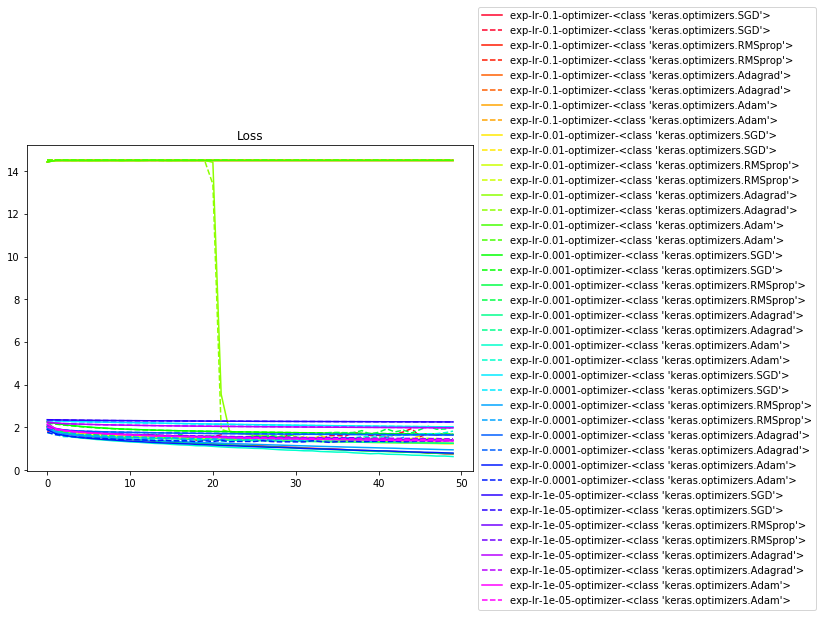

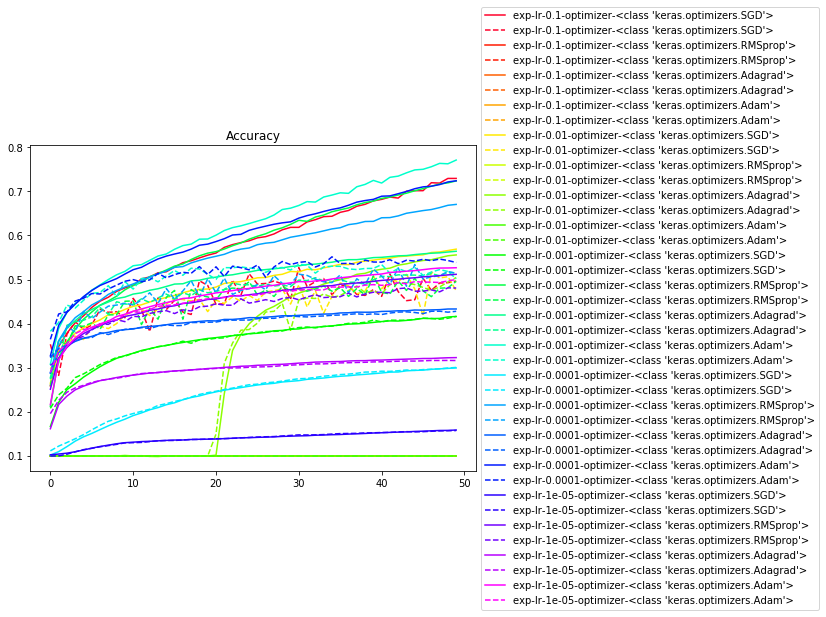

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline
 
"""
將實驗結果繪出
"""
NUM_COLORS = len(results.keys())
cm = plt.get_cmap('gist_rainbow')
color_bar = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()